In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

然后导入数据，并进行初步的观察，这些观察包括了解数据特征的缺失值，异常值，以及大概的描述性统计

In [2]:
# 导入北京二手房数据
lianjia_df = pd.read_csv('./lianjia.csv',encoding='utf-8')
# display(lianjia_df.head(n=20))
# lianjia_df.head()
lianjia_df

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
23672,南北,广渠门,NaN,16,保利蔷薇,101102296423,2室1厅,1010.0,东城,简装,97.0,2008
23673,南北,永定门,NaN,6,郭庄北里,101102593534,2室1厅,468.0,东城,简装,66.0,1995
23674,南北,和平里,NaN,6,康鸿家园,101102549465,3室2厅,1400.0,东城,简装,155.0,2000
23675,南北,前门,NaN,6,台基厂头条10号院,101102322422,4室1厅,1100.0,东城,简装,107.0,1990


In [3]:
lianjia_df.columns=['朝向','街道','配备电梯','所在楼层','小区','编号','户型','价格','区域','装修情况','面积','年份']

In [4]:
display(lianjia_df.head(n=20))# lianjia_df.head()

,朝向,街道,配备电梯,所在楼层,小区,编号,户型,价格,区域,装修情况,面积,年份
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010
5,南北,广渠门,有电梯,18,幸福家园二期,101102407993,2室1厅,1180.0,东城,其他,111.0,2003
6,南,西罗园,无电梯,6,西革新里110号院,101102629841,1室1厅,319.0,东城,其他,42.0,1992
7,南,西罗园,有电梯,16,建予园,101102378003,2室1厅,640.0,东城,其他,105.0,1999
8,南北,东花市,有电梯,9,富贵园一区,101102345859,3室2厅,1780.0,东城,精装,161.0,2003
9,东北,东直门,有电梯,25,万国城MOMA,101102070529,2室2厅,1300.0,东城,精装,127.0,2002


初步观察到一共有12个特征变量，价格 在这里是我们的目标变量，然后我们继续深入观察一下。

In [5]:
# 检查缺失值情况
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   朝向      23677 non-null  object 
 1   街道      23677 non-null  object 
 2   配备电梯    15440 non-null  object 
 3   所在楼层    23677 non-null  int64  
 4   小区      23677 non-null  object 
 5   编号      23677 non-null  int64  
 6   户型      23677 non-null  object 
 7   价格      23677 non-null  float64
 8   区域      23677 non-null  object 
 9   装修情况    23677 non-null  object 
 10  面积      23677 non-null  float64
 11  年份      23677 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


发现了数据集一共有23677条数据，其中 “配备电梯” 特征有明显的缺失值

In [6]:
# 数值型变量统计量描述
lianjia_df.describe()

,所在楼层,编号,价格,面积,年份
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


上面结果给出了特征值是数值的一些统计值，包括平均数，标准差，中位数，最小值，最大值，25%分位数，75%分位数。这些统计结果简单直接，对于初始了解一个特征好坏非常有用，比如我们观察到    “面积”    特征 的最大值为1019平米，最小值为2平米，那么我们就要思考这个在实际中是不是存在的，如果不存在没有意义，那么这个数据就是一个异常值（会严重影响模型的性能）

In [7]:
#查看重复值数量
lianjia_df.duplicated().value_counts()

False    22468
True      1209
dtype: int64

True表示重复数量，有1209个重复值，所以要通过drop_duplicates方法去除数据集中所有重复值

In [8]:
lianjia_df = lianjia_df.drop_duplicates(subset=None,keep='first',inplace=False)
lianjia_df.duplicated().value_counts()

False    22468
dtype: int64

In [9]:
# 添加新特征房屋均价
df = lianjia_df.copy()
df['均价'] = lianjia_df['价格']/lianjia_df['面积']
 
# 重新摆放列位置
columns = ['区域', '街道', '小区', '户型', '所在楼层', '年份', '面积', '配备电梯', '朝向', '装修情况', '均价', '价格']
df = pd.DataFrame(df, columns = columns)
 
# 重新审视数据集
display(df.head(n=20))

,区域,街道,小区,户型,所在楼层,年份,面积,配备电梯,朝向,装修情况,均价,价格
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.400000,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.750000,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.666667,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,NaN,南,精装,10.769231,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.088889,998.0
5,东城,广渠门,幸福家园二期,2室1厅,18,2003,111.0,有电梯,南北,其他,10.630631,1180.0
6,东城,西罗园,西革新里110号院,1室1厅,6,1992,42.0,无电梯,南,其他,7.595238,319.0
7,东城,西罗园,建予园,2室1厅,16,1999,105.0,有电梯,南,其他,6.095238,640.0
8,东城,东花市,富贵园一区,3室2厅,9,2003,161.0,有电梯,南北,精装,11.055901,1780.0
9,东城,东直门,万国城MOMA,2室2厅,25,2002,127.0,有电梯,东北,精装,10.236220,1300.0


我们发现 Id 特征其实没有什么实际意义，所以将其移除。由于房屋单价分析起来比较方便，简单的使用总价/面积就可得到，所以增加一个新的特征 “均价”（只用于分析，不是预测特征）。另外，特征的顺序也被调整了一下，看起来比较舒服。

# 数据可视化分析

1.区域  特征分析

对于区域特征，我们可以分析不同区域房价和数量的对比。

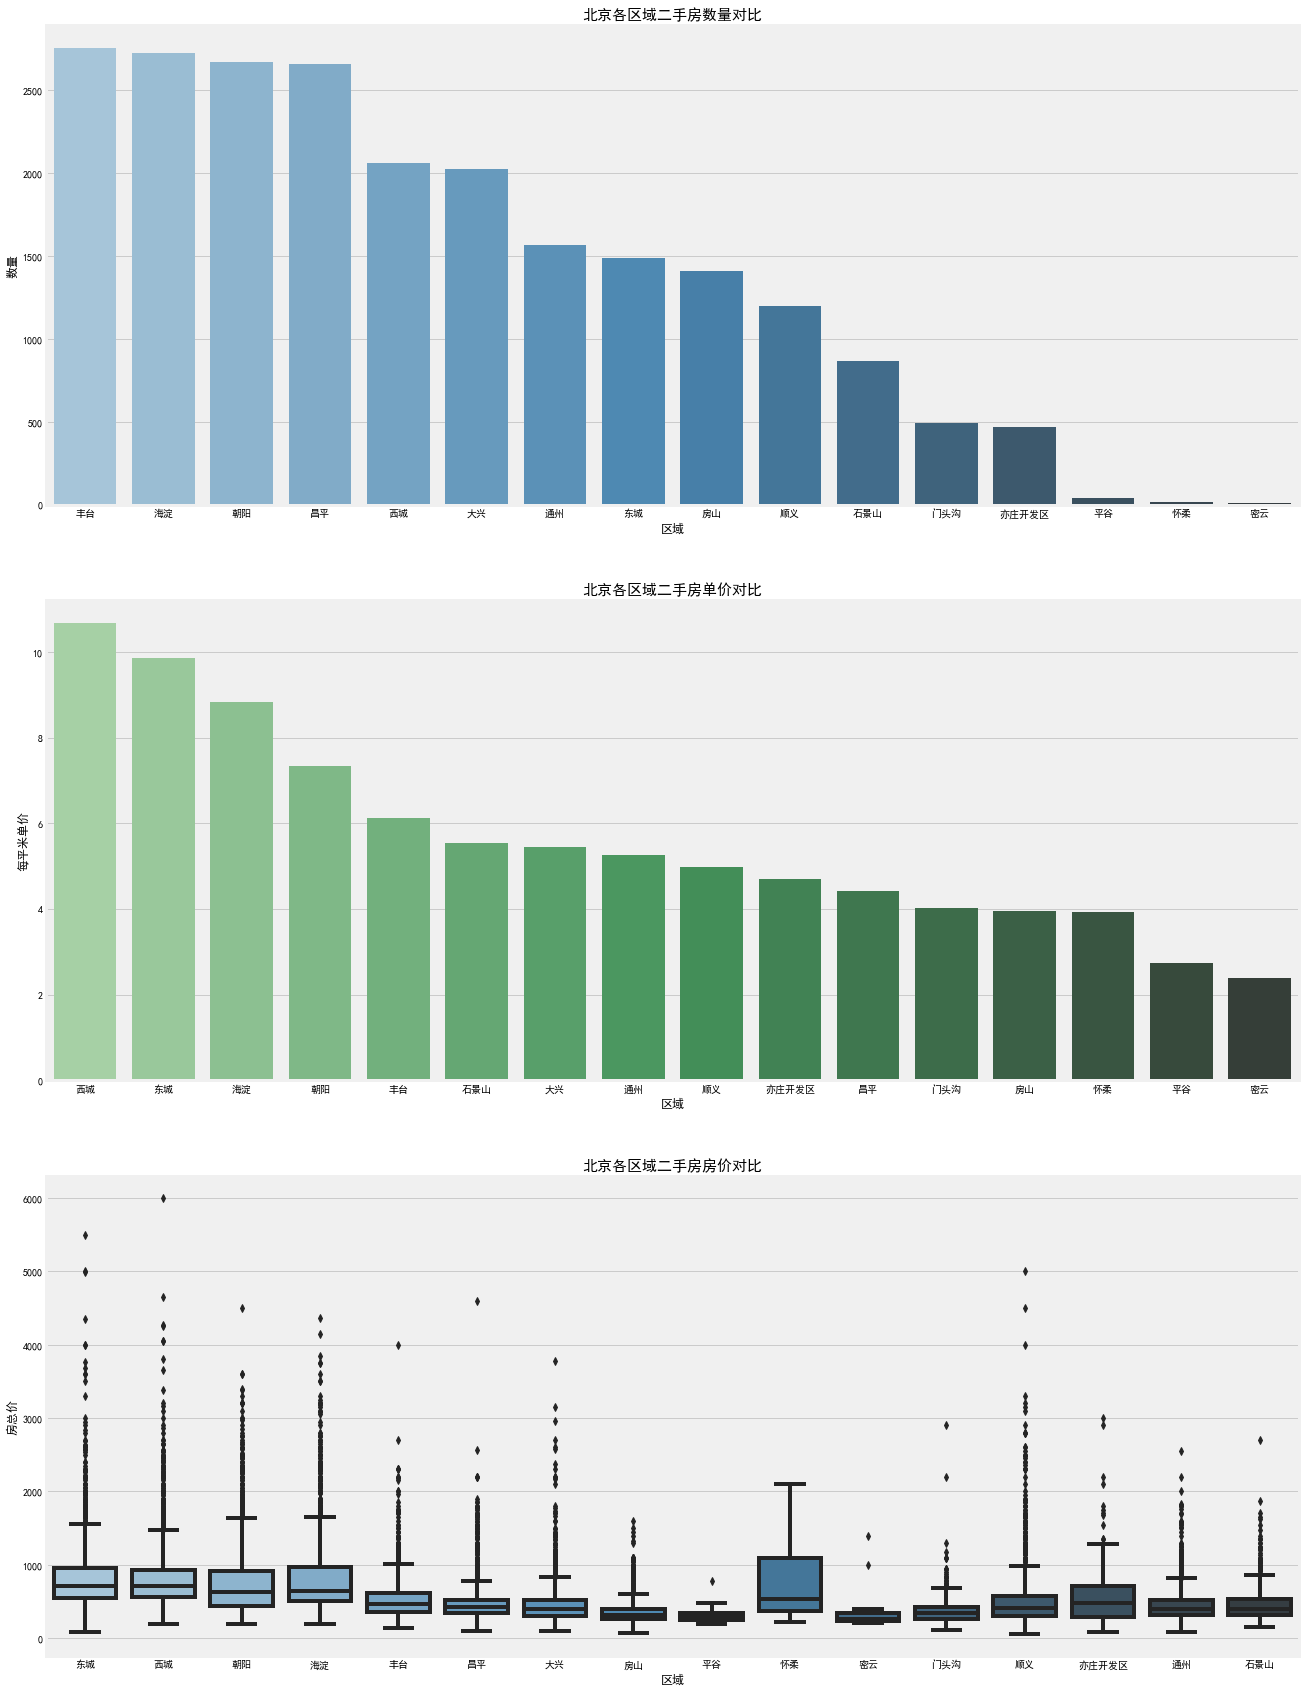

In [10]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('区域')['价格'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('区域')['均价'].mean().sort_values(ascending=False).to_frame().reset_index()
 
plt.figure(figsize=(20,30))
plt.subplot((311))
sns.barplot(x='区域', y='价格', palette='Blues_d', data=df_house_count)
plt.title('北京各区域二手房数量对比', fontsize=15)
plt.xlabel('区域')
plt.ylabel('数量')

plt.subplot((312))
sns.barplot(x='区域', y='均价', palette='Greens_d', data=df_house_mean)
plt.title('北京各区域二手房单价对比', fontsize=15)
plt.xlabel('区域')
plt.ylabel('每平米单价')

plt.subplot((313))
sns.boxplot(x='区域', y='价格', palette='Blues_d', data=df)
plt.title('北京各区域二手房房价对比', fontsize=15)
plt.xlabel('区域')
plt.ylabel('房总价')

plt.show()

使用了pandas的网络透视功能 groupby 分组排序。区域特征可视化直接采用 seaborn 完成，颜色使用调色板 palette 参数，颜色渐变，越浅说明越少，反之越多。


可以观察到：

    1.  二手房数量：丰田区数量最多，然后是海淀区，朝阳区。
    
    2.  二手房单价：西城区房价最贵，约11万/平，因为西城区在二环内，且有很多热门学区房。其次是东城区，约10万/平，然后是海淀区8.5万/平，其余区域均低于8万/平。

    3.  二手房总价：通过箱型图看到，各大区域房屋总价中位数都都在1000万以下，且房屋总价离散值较高，西城最高达到了6000万，说明房屋价格特征不是理想的正太分布。


2.建筑面积  特征分析

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


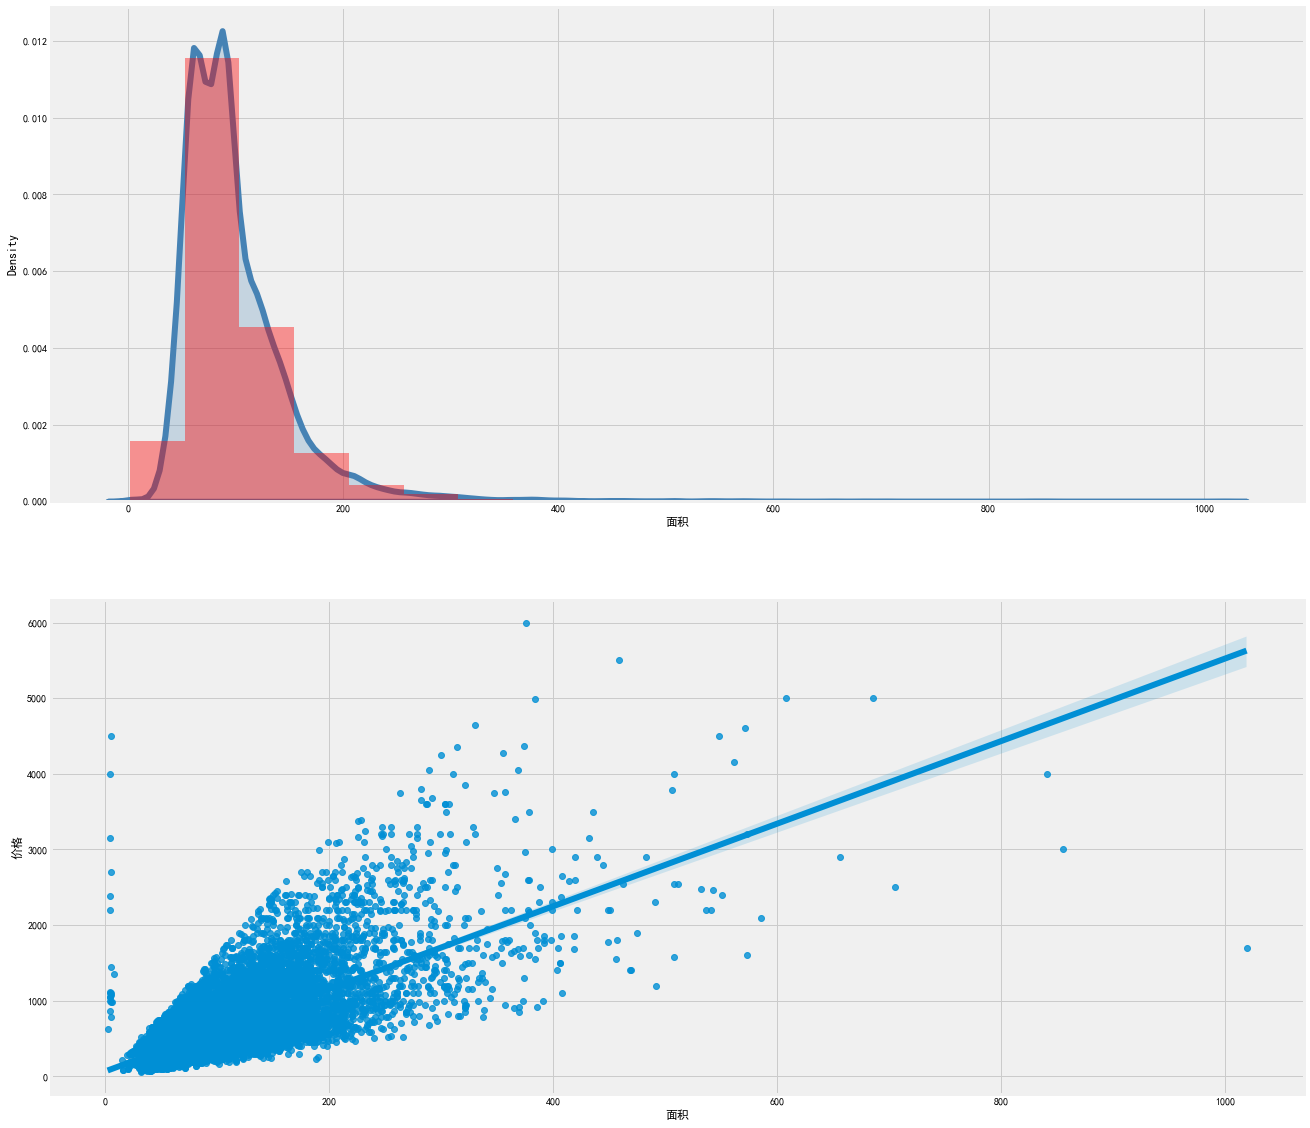

In [11]:
plt.figure(figsize=(20,20))
plt.subplot((211))
#二手房面积的分布情况
sns.distplot(df['面积'], bins=20, color='r', kde=True, kde_kws={'color':'steelblue','shade':True,'linewidth':6})
#二手房价格与面积的关系
plt.subplot((212))
sns.regplot(x='面积', y='价格', data=df)

plt.show()


1. 面积 分布：通过 distplot  和 kdeplot 绘制柱状图观察 面积 特征的分布情况，属于长尾类型的分布，这说明了有很多面积很大且超出正常范围的二手房。



2. 面积 与 价格 的关系：通过 regplot 绘制了 面积 和 价格 之间的散点图，发现 面积 特征基本与 价格 呈现线性关系，符合基本常识，面积越大，价格越高。但是有两组明显的异常点：1. 面积不到10平方米，但是价格超出10000万；2. 一个点面积超过了1000平方米，价格很低，需要查看是什么情况。


In [12]:
df.loc[df['面积']< 10]

,区域,街道,小区,户型,所在楼层,年份,面积,配备电梯,朝向,装修情况,均价,价格
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.000000,2700.0


经过查看发现这组数据是别墅，出现异常的原因是由于别墅结构比较特殊（无朝向无电梯），字段定义与二手商品房不太一样导致爬虫爬取数据错位。也因别墅类型二手房不在我们的考虑范围之内，故将其移除再次观察 面积 分布和 价格 关系。

In [13]:
df.loc[df['面积']>1000]

,区域,街道,小区,户型,所在楼层,年份,面积,配备电梯,朝向,装修情况,均价,价格
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,2009,1019.0,有电梯,南,简装,1.668302,1700.0


经观察这个异常点不是普通的民用二手房，很可能是商用房，所以才有1房间0厅确有如此大超过1000平米的面积，这里选择移除。

In [14]:
df = df[(df['户型']!='叠拼别墅')&(df['面积']<1000)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


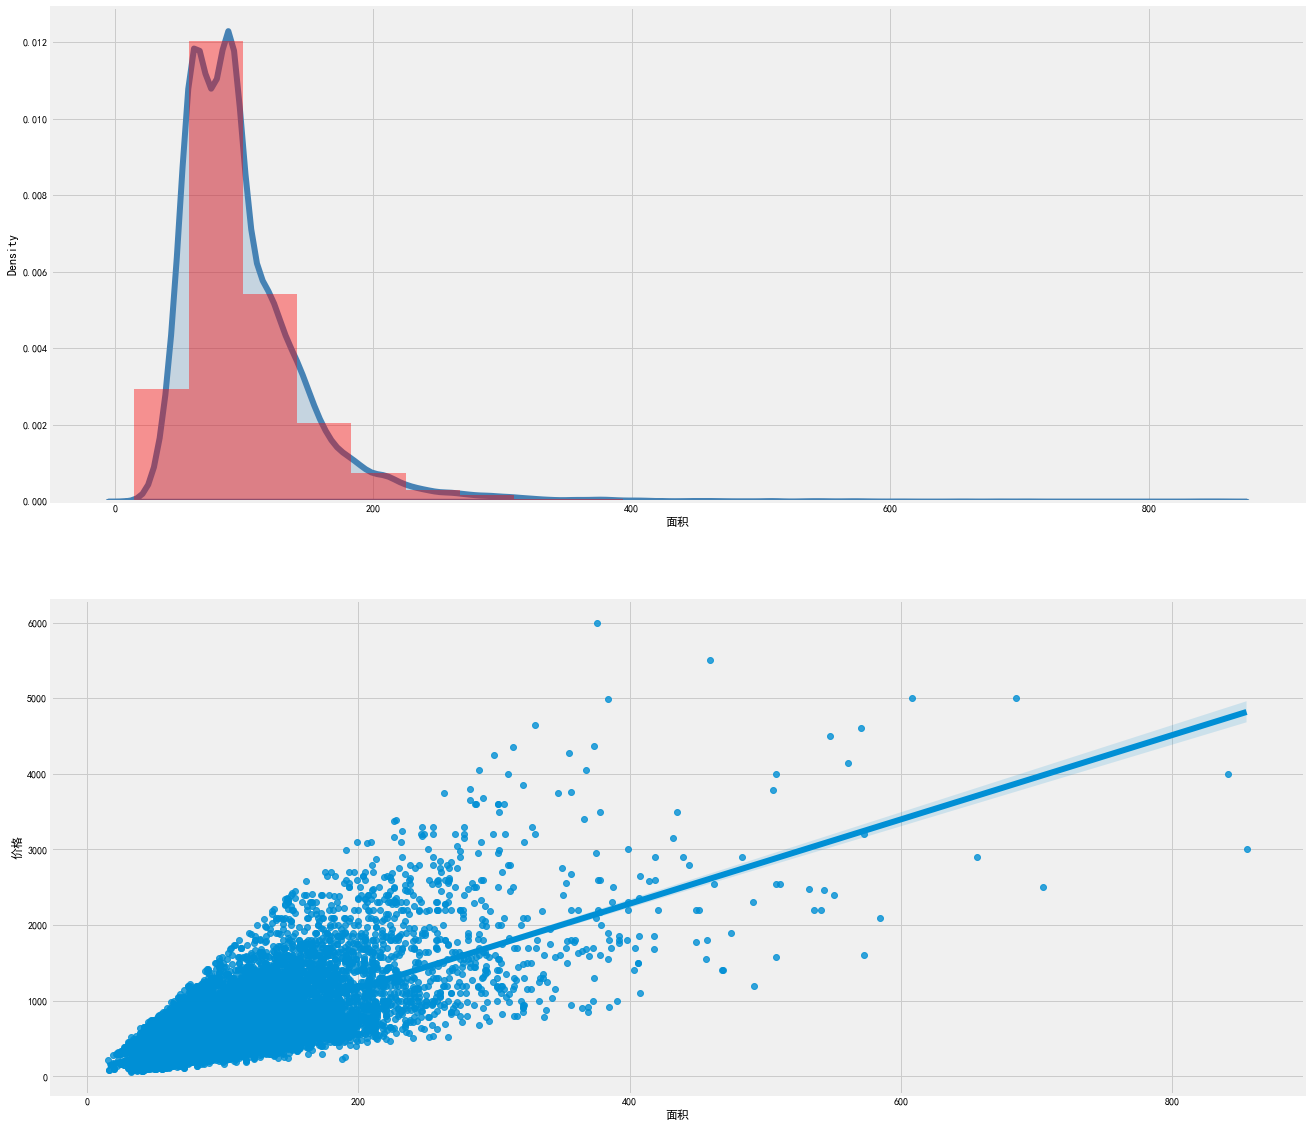

In [15]:
plt.figure(figsize=(20,20))
plt.subplot((211))
#二手房面积的分布情况
sns.distplot(df['面积'], bins=20, color='r', kde=True, kde_kws={'color':'steelblue','shade':True,'linewidth':6})
#二手房价格与面积的关系
plt.subplot((212))
sns.regplot(x='面积', y='价格', data=df)

plt.show()

重新进行可视化发现就没有明显的异常点了。

3.户型  特征分析

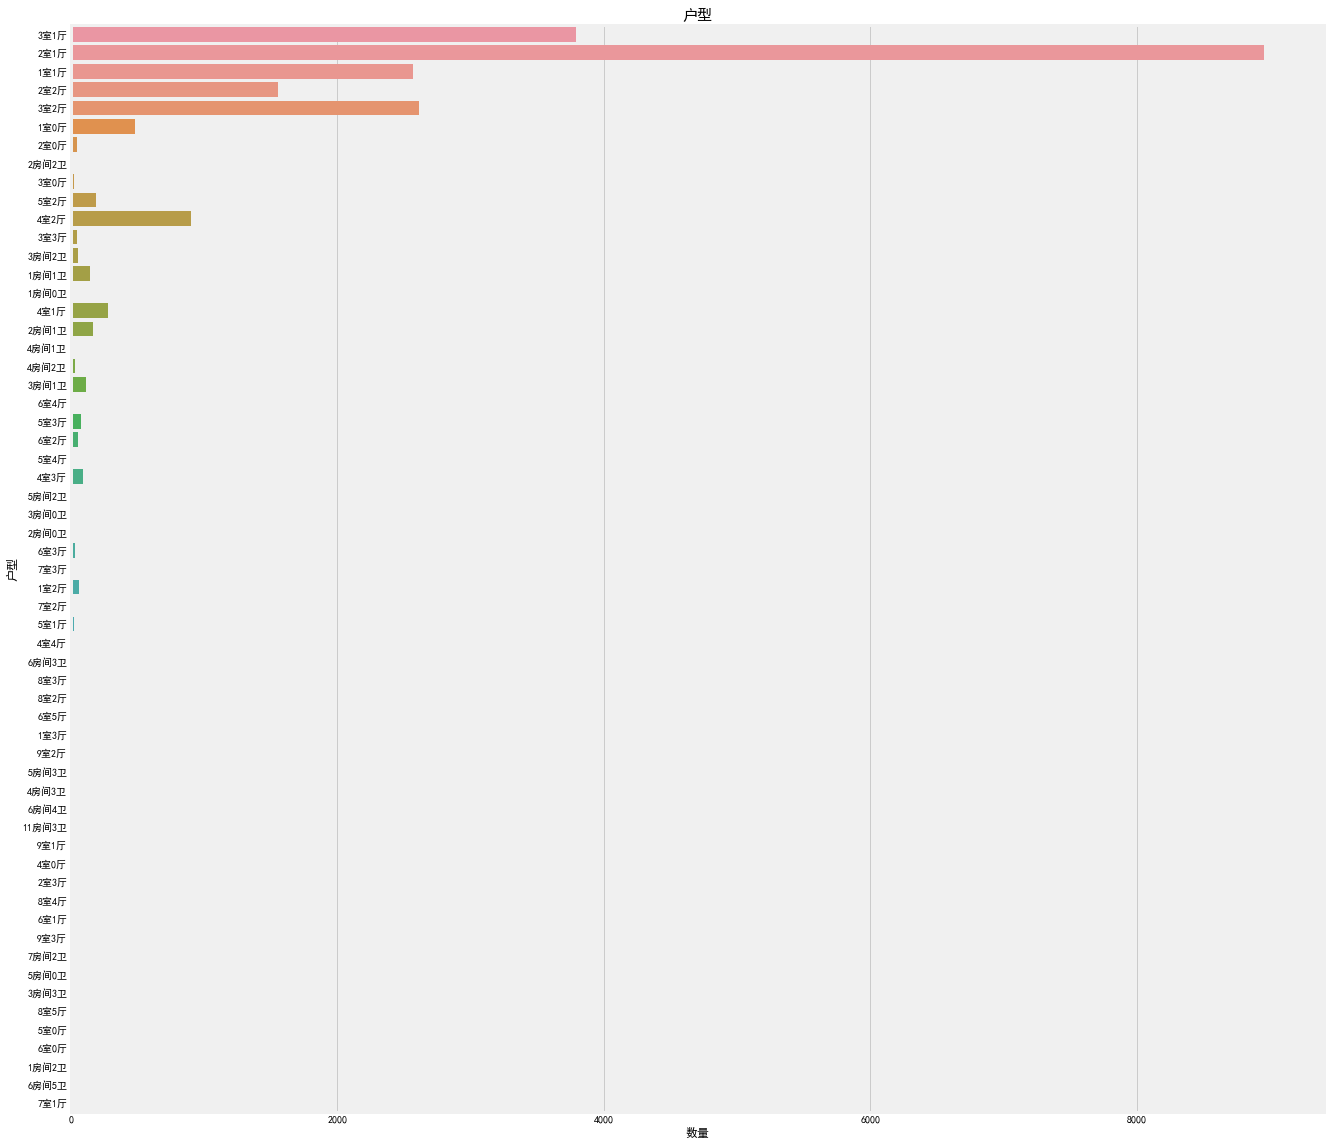

In [16]:
plt.figure(figsize=(20,20))
sns.countplot(y='户型', data=df)
plt.title('户型', fontsize=15)
plt.xlabel('数量')
plt.ylabel('户型')
plt.show()

经过观察发现：户型有很多种，其中2室1厅占大多数，其次是3室1厅、2室2厅、3室2厅。仔细观察Layout特征发现，其分类下存在一些不规则的命名，如2室1厅和2房间1卫，叫法不统一，在进行机器学习之前需要使用特征工程进行相应地处理


4.装修情况 特征分析

In [17]:
df['装修情况'].value_counts()

精装    10727
简装     8076
其他     3080
毛坯      564
Name: 装修情况, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


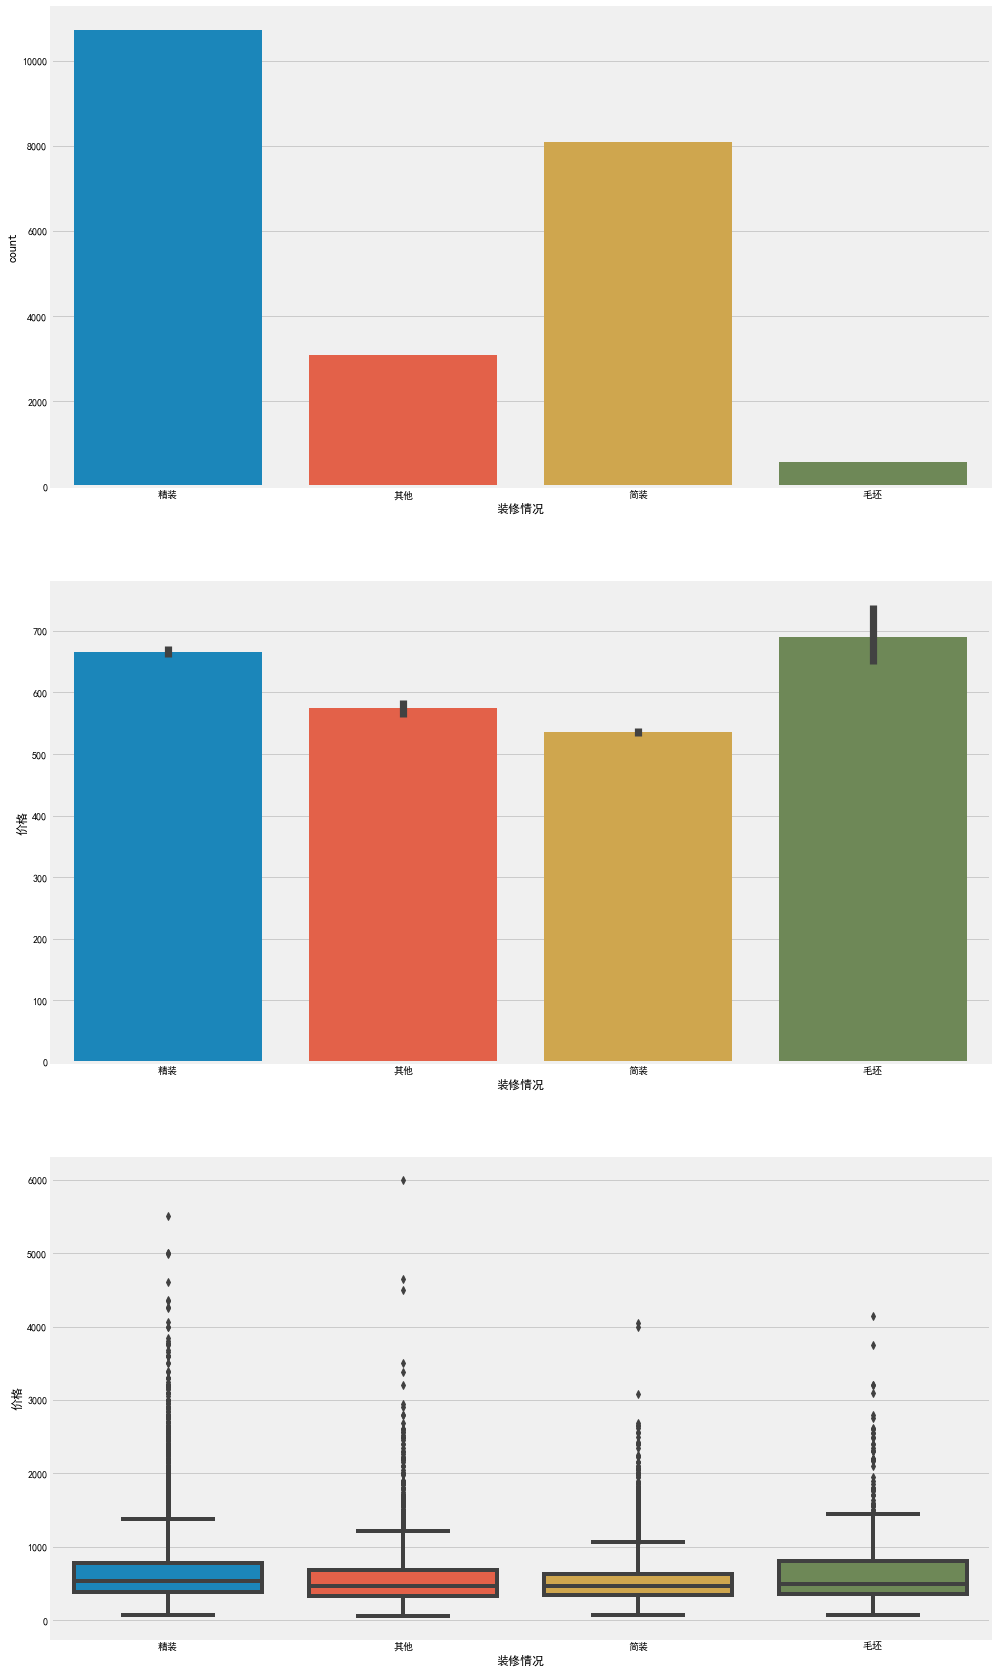

In [18]:
#绘制装修情况各分类的数量情况
plt.figure(figsize=(15,30))
plt.subplot((311))
sns.countplot(df['装修情况'])

#绘制装修情况与价格之间的关系
plt.subplot((312))
sns.barplot(x='装修情况', y='价格', data=df)
plt.subplot((313))
sns.boxplot(x='装修情况', y='价格', data=df)
plt.show()

经过观察发现：精装修的二手房数量最多，其次是简装。另外，毛坯类型价格却最高，其次是精装修。

5.配备电梯 特征分析

初探数据的时候，我们发现 配备电梯 特征是有大量缺失值的，这对于我们是十分不利的，首先我们先看看有多少缺失值

In [19]:
# 检查缺失值情况
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22447 entries, 0 to 23676
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   区域      22447 non-null  object 
 1   街道      22447 non-null  object 
 2   小区      22447 non-null  object 
 3   户型      22447 non-null  object 
 4   所在楼层    22447 non-null  int64  
 5   年份      22447 non-null  int64  
 6   面积      22447 non-null  float64
 7   配备电梯    14548 non-null  object 
 8   朝向      22447 non-null  object 
 9   装修情况    22447 non-null  object 
 10  均价      22447 non-null  float64
 11  价格      22447 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 2.7+ MB


In [20]:
df['配备电梯'].value_counts()
#查看缺失值
df.loc[df['配备电梯'].isnull()].shape

(7899, 12)

缺失值处理：常用的方法有平均值/中位数填补法，直接移除，或者根据其他特征建模预测等。


配备电梯特征存在7899条缺失数据，这里采用替换法对缺失值进行填补。思路：根据楼层来判断有无电梯，一般的楼层大于6的都有电梯，而小于等于6层的一般都没有电梯。


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


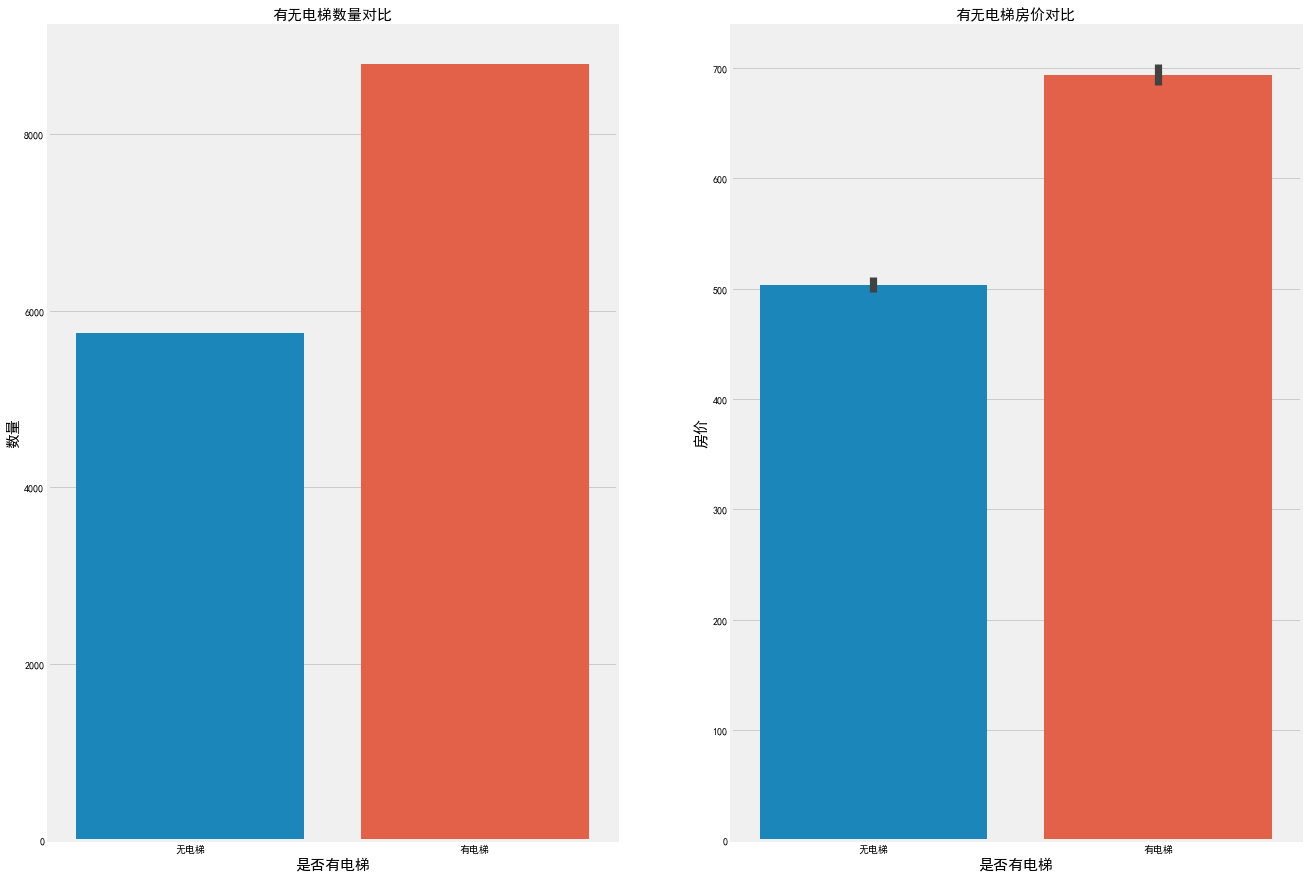

In [21]:
#填补缺失值
df.loc[(df['所在楼层']>6)&(df['配备电梯'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['所在楼层']<=6)&(df['配备电梯'].isnull()), 'Elevator'] = '无电梯'

#绘制Elevator不同类别的数量
plt.figure(figsize=(20,15))
plt.subplot((121))
sns.countplot(df['配备电梯'])
plt.title('有无电梯数量对比',fontsize=15)
plt.xlabel('是否有电梯',fontsize=15)
plt.ylabel('数量',fontsize=15)

#绘制Elevator类别与Price的关系
plt.subplot((122))
sns.barplot(x='配备电梯', y='价格', data=df)
plt.title('有无电梯房价对比',fontsize=15)
plt.xlabel('是否有电梯',fontsize=15)
plt.ylabel('房价',fontsize=15)
plt.show()


经过观察发现：有电梯的二手房数量居多，因为高层土地利用率较高，适合北京庞大人群的需要，而高层就需要有电梯。相应的，有电梯房价一般就会较高。

6.年份 特征分析

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


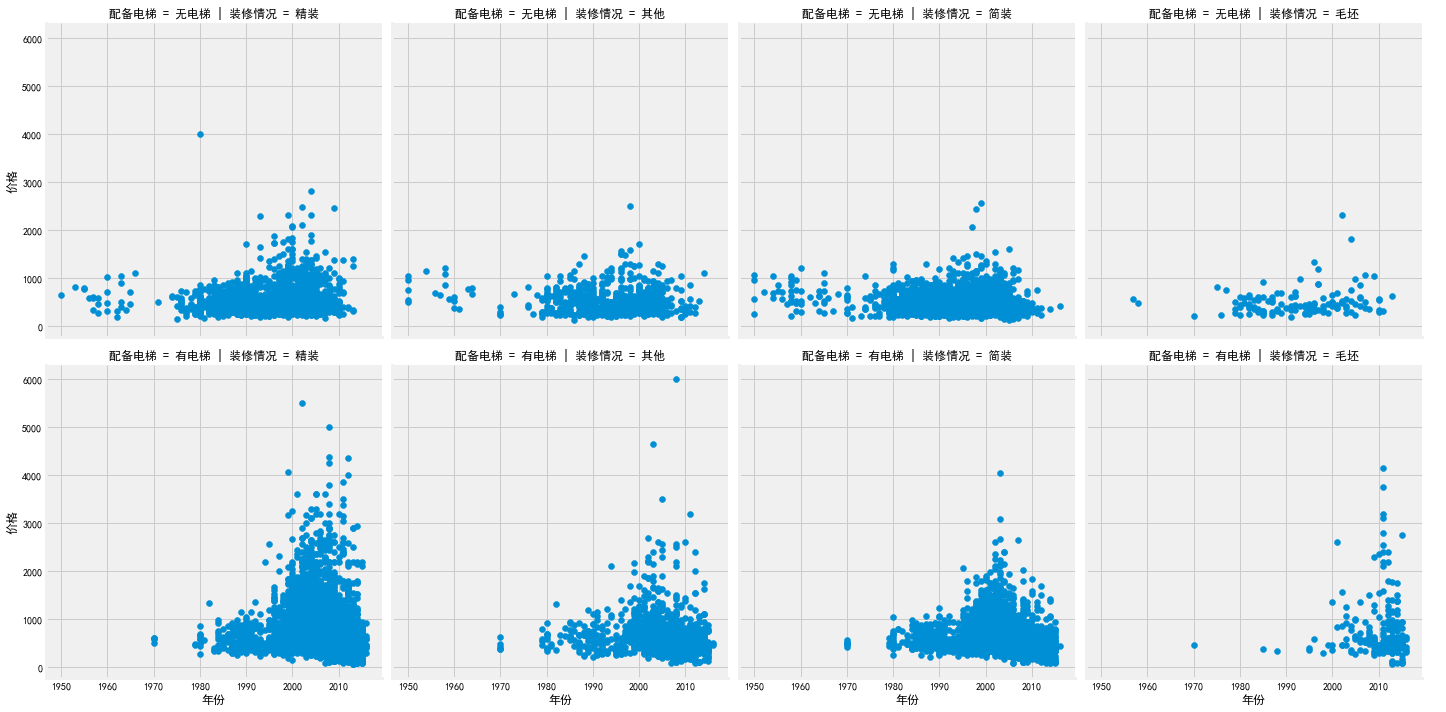

In [22]:
#绘制配备电梯和装修情况不同的分类情况下，Year与Price的关系
grid = sns.FacetGrid(df, row='配备电梯', col='装修情况', palette='pal', size=5) #size可调节图形间距
grid.map(plt.scatter, '年份', '价格')
grid.add_legend()
plt.show()

在 装修情况 和 配备电梯 的分类条件下，使用 FaceGrid 分析 年份 特征，观察结果如下：

二手房房价随房龄的增长而降低；
2000年以后建造的二手房房价相较于2000年以前有很明显的价格上涨；
1980年之前几乎不存在有电梯二手房数据，说明1980年之前还没有大面积安装电梯；
1980年之前无电梯二手房中，简装二手房占绝大多数，精装反而很少；


7.楼层 特征分析

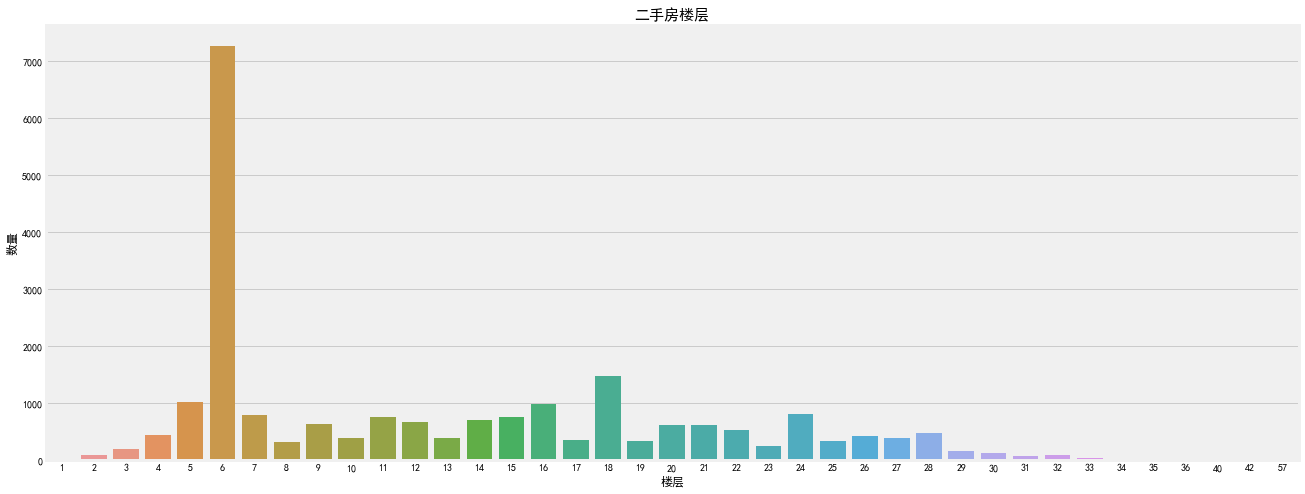

In [23]:
#绘制不同楼层的数量关系
plt.figure(figsize=(20,8))
sns.countplot(x='所在楼层', data=df)
plt.title('二手房楼层',fontsize=15)
plt.xlabel('楼层')
plt.ylabel('数量')
plt.show()

经过观察发现：6层的二手房数量最多，但是单独的楼层特征没有意义，因为每个小区住房的总楼层数不一样。正常情况下，中间楼层比较受欢迎，价格也高，底层和顶层受欢迎度较低，价格也相对较低。

# 特征工程

对数据进一步处理

1.户型特征

In [24]:
#只保留'xx室xx厅'数据，将其它少数房间与卫移除
df = df.loc[df['户型'].str.extract('^\d(.*?)\d.*?', expand=False)=='室']

#提取'室'和'厅'创建新特征
df['室'] = df['户型'].str.extract('(^\d).*', expand=False).astype('int64')
df['厅'] = df['户型'].str.extract('^\d.*?(\d).*', expand=False).astype('int64')

df['户型'].value_counts()

C:\Users\17234\AppData\Local\Temp/ipykernel_33524/1781876265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['室'] = df['户型'].str.extract('(^\d).*', expand=False).astype('int64')
C:\Users\17234\AppData\Local\Temp/ipykernel_33524/1781876265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['厅'] = df['户型'].str.extract('^\d.*?(\d).*', expand=False).astype('int64')


2室1厅    8955
3室1厅    3792
3室2厅    2614
1室1厅    2569
2室2厅    1558
4室2厅     899
1室0厅     480
4室1厅     282
5室2厅     191
4室3厅      95
5室3厅      74
1室2厅      62
6室2厅      57
2室0厅      47
3室3厅      43
6室3厅      29
5室1厅      26
3室0厅      25
7室3厅       6
2室3厅       5
7室2厅       5
6室4厅       4
8室3厅       4
4室4厅       4
5室4厅       4
8室2厅       3
4室0厅       3
6室0厅       2
6室1厅       1
5室0厅       1
8室5厅       1
9室3厅       1
6室5厅       1
8室4厅       1
9室1厅       1
9室2厅       1
1室3厅       1
7室1厅       1
Name: 户型, dtype: int64

2.年份特征

In [25]:
#对Year特征进行分箱，等频分段(按年限，Year划分太细，故将连续型数值Year特征离散化)
df['年份'] = pd.qcut(df['年份'],8).astype('object')

df['年份'].value_counts()

C:\Users\17234\AppData\Local\Temp/ipykernel_33524/3564354598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['年份'] = pd.qcut(df['年份'],8).astype('object')


(2000.0, 2003.0]      3510
(2003.0, 2005.0]      2990
(1990.0, 1997.0]      2919
(1949.999, 1990.0]    2873
(1997.0, 2000.0]      2653
(2010.0, 2017.0]      2606
(2007.0, 2010.0]      2438
(2005.0, 2007.0]      1859
Name: 年份, dtype: int64

3.朝向特征

In [26]:
df['朝向'].value_counts()

南北        10837
南          2580
东西         1314
东南         1218
西南         1019
东           819
西           748
西北          687
东北          602
北           460
东南北         433
南西北         355
南西          146
东西北         132
东南西         126
西南北         118
东南西北         85
西南东北         21
南东北          18
东南西南         13
东南南          13
西南西北         10
东东南          10
西东北           9
南西南           9
东西南           8
东南东北          7
东南南北          5
西南西           5
南西东北          3
西北东北          2
西西北           2
南西北北          2
东东北           2
南西南西          2
南东            2
东西南北          2
西西南           2
南西南北          2
东南西南东北        1
北西            1
北南            1
南西西北          1
东南西北东北        1
东西北东北         1
东南西北北         1
东东南南          1
南北东           1
东南西南北         1
西北北           1
东北东北          1
东南南西北         1
东西北北          1
西南西北东北        1
东南北西          1
南北东北          1
西南西北北         1
南北西           1
东西东北          1
Name: 朝向, dtype: int64

定义函数，将朝向中重复但顺序不一样的特征值合并，比如’西南北’和’南西北’，并且移除一些不合理的值，如’西南西北北’

In [28]:
list_one_num = ['东','西','南','北']
list_two_num = ['东西','东南','东北','西南','西北','南北']
list_three_num = ['东西南','东西北','东南北','西南北']
list_four_num = ['东西南北']

def direct_func(x):
    if not isinstance(x, str):
        raise TypeError
    
    x = x.strip()
    x_len = len(x)
    x_list = pd.unique([y for y in x])
    if x_len != len(x_list):
        return 'no'
    
    if (x_len==2)&(x not in list_two_num):
        m0=x[0]
        m1=x[1]
        return m1+m0
    elif (x_len==3)&(x not in list_three_num):
        for n in list_three_num:
            if (x_list[0] in n)&(x_list[1] in n)&(x_list[2] in n):
                return n
    elif (x_len==4)&(x not in list_four_num):
        return list_four_num[0]
    else:
        return x
    
df['朝向'] = df['朝向'].apply(direct_func)
df = df.loc[(df['朝向']!='no')&(df['朝向']!='nan')]


In [29]:
df['朝向'].value_counts()

南北      10838
南        2580
东西       1314
东南       1220
西南       1165
东         819
西         748
西北        688
东北        602
西南北       474
北         460
东南北       452
东西北       141
东西南       134
东西南北      112
Name: 朝向, dtype: int64

创建新特征


这里尝试将"室"与"厅"的数量相加作为一个总数量特征，然后将房屋大小与总数量的比值作为一个新特征，可理解为 "每个房间的平均面积大小"。

In [30]:
#每个房间的平均面积
df['总数'] = df['室'] + df['厅']
df['平均面积大小'] = df['面积']/df['总数']

删除没用的特征

In [31]:
#删除无用特征
df = df.drop(['户型','均价','小区'], axis=1)
display(df.head())

,区域,街道,所在楼层,年份,面积,配备电梯,朝向,装修情况,价格,Elevator,室,厅,总数,平均面积大小
0,东城,灯市口,6,"(1949.999, 1990.0]",75.0,NaN,东西,精装,780.0,无电梯,3,1,4,18.75
1,东城,东单,6,"(1949.999, 1990.0]",60.0,无电梯,南北,精装,705.0,NaN,2,1,3,20.00
2,东城,崇文门,16,"(1990.0, 1997.0]",210.0,有电梯,西南,其他,1400.0,NaN,3,1,4,52.50
3,东城,崇文门,7,"(2003.0, 2005.0]",39.0,NaN,南,精装,420.0,有电梯,1,1,2,19.50
4,东城,陶然亭,19,"(2007.0, 2010.0]",90.0,有电梯,南,精装,998.0,NaN,2,2,4,22.50


对object类型的特征进行One-hot编码

这部分是 One-hot 独热编码，因为像 区域，年份（离散分箱后），朝向，装修情况，配备电梯等特征都是定类的非数值型类型，而作为模型的输入我们需要将这些非数值量化。

在没有一定顺序（定序类型）的情况下，使用独热编码处理定类数据是非常常用的做法，在pandas中非常简单，就是使用 get_dummies() 方法，而对于像Size这样的定比数据则不使用独热，博主这里用了一个自己封装的函数实现了定类数据的自动量化处理。

In [32]:
#定义函数，One-hot编码
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype=='object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    
    return df, new_columns

df, df_cat = one_hot_encoder(df)

特征相关性



下面使用 seaborn 的 heatmap 方法对特征相关性进行可视化。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

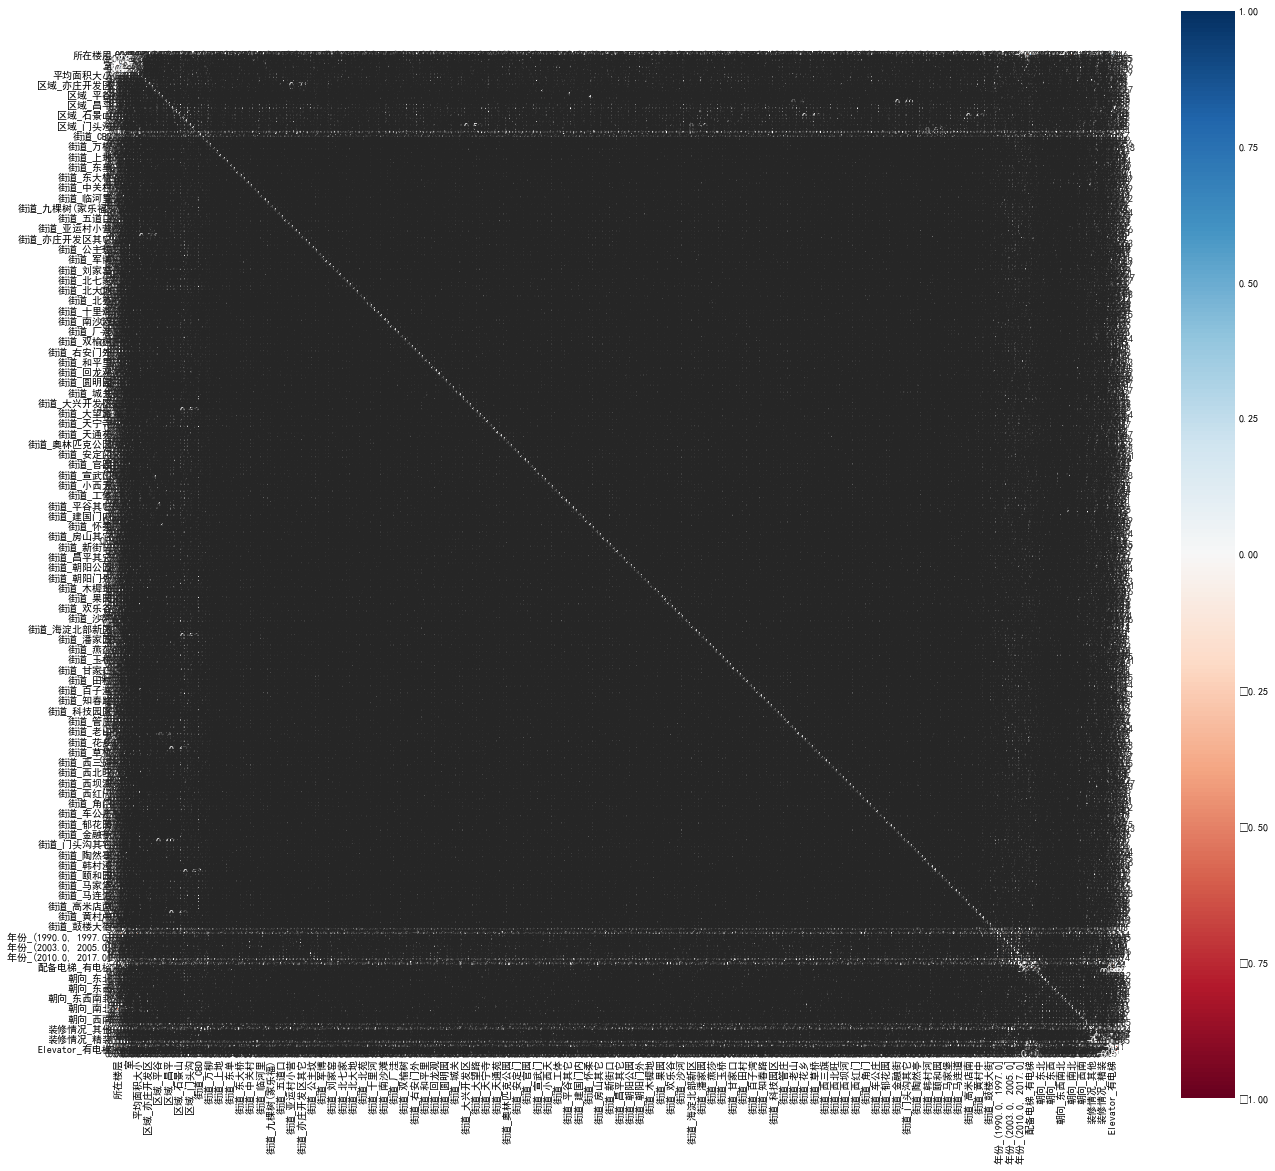

In [33]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

颜色偏红或者偏蓝都说明相关性较大，即这两个特征对于目标变量的影响程度相似，即存在严重的重复信息，会造成过拟合现象。通过以上特征相关性分析，可以找出有严重重叠信息的特征，然后择优选择。

# 线性回归


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import tkinter as tk
#定义训练集、测试集
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)
#定义训练数据列
X_train = np.array(train_data['面积'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['价格'], dtype=pd.Series)
#定义测试数据列
X_test = np.array(test_data['面积'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['价格'], dtype=pd.Series)
#选择模型
lr = linear_model.LinearRegression()
# 训练模型
lr.fit(X_train,y_train)
#预测、推断
pred = lr.predict(X_test)

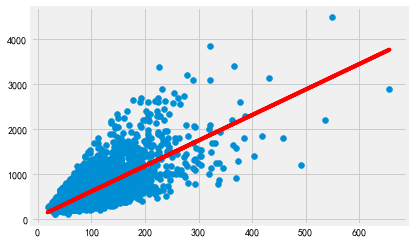

In [34]:
#图表显示
plt.scatter(X_test, y_test)
plt.plot(X_test,pred,color='r')
plt.show()

从肉眼上看，这条线性回归效果似乎并不太理想，我们用数据说话，计算下该模型的评分如何。我们一般用以下指标来衡量模型的好坏：R2（决定系数）、RMSE（均方根误差）、cv（K折交叉验证系数）。我们先看下该模型的R2评分如何：

In [35]:
#计算模型评分
X = np.array(df['面积']).reshape(-1,1)
print(lr.score(X,df['价格']))

0.4728567673924272


R2分数越高，说明模型的准确率越高，低于50%的准确率，模型确实不太理想啊。但既然做出来了，我们用该模型预测下房价。

In [36]:
#计算系数和截距
intercept=float(lr.intercept_)
coef=float(lr.coef_)
print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(intercept))
print('Coefficient: {}'.format(coef))
# 实例化object，建立窗口window
window = tk.Tk()
# 第2步，给窗口的可视化起名字
window.title('房价预测计算器-线性回归')
# 设定窗口的大小(长 * 宽)
window.geometry('500x300')  # 这里的乘是小x
# 在图形界面上设定输入框控件entry框并放置
a = tk.Label(window, text="房屋面积：")
a.place(x='30',y='50',width='80',height='40')
e = tk.Entry(window, show = None)#显示成明文形式
e.place(x='120',y='50',width='180',height='40')
# 定义触发事件
def calculate(): # 在鼠标焦点处插入输入内容
    var = e.get()
    ans = coef*float(var)+intercept
    ans = '%.2f'%ans
    result.set(str(ans))   
# 创建并放置一个按钮
b1 = tk.Button(window, text='预测房价', width=10, height=2, command=calculate)
b1.place(x='320',y='50',width='100',height='40')
# 创建并放置一个多行文本框text用以显示
w = tk.Label(window, text="预测房价（万元）：")
w.place(x='50',y='150',width='120',height='50')
result = tk.StringVar()
show_dresult = tk.Label(window, bg='white',fg = 'black',font = ('Arail','16'),bd='0',textvariable=result,anchor='e')
show_dresult.place(x='200',y='150',width='250',height='50')
# 主窗口循环显示
window.mainloop()

Average Price for Test Data: 611.784
Intercept: 51.71238840531828
Coefficient: 5.667543471828488


# 岭回归

线性回归呈现了房价与房屋面积的关系，但实际上，房价的影响因素可不止面积，还有室数和厅数，当然还有其他一些特征。我们本次用这3个特征进行岭回归预测

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import tkinter as tk
df_dm = df
train_data_dm, test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)
features = ['面积','室','厅']
complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['价格'])
pred1 = complex_model_R.predict(test_data_dm[features])
intercept=float(complex_model_R.intercept_)
coef=list(complex_model_R.coef_)
print('Intercept: {}'.format(intercept))
print('Coefficients: {}'.format(coef))
#计算模型评分
print(complex_model_R.score(df_dm[features],df_dm['价格']))
# 实例化object，建立窗口window
window = tk.Tk()
# 给窗口的可视化起名字
window.title('房价预测计算器-岭回归')
# 设定窗口的大小(长 * 宽)
window.geometry('500x350')  # 这里的乘是小x
# 在图形界面上设定输入框控件entry框并放置
a = tk.Label(window, text="面积：")
a.place(x='30',y='50',width='80',height='40')
e = tk.Entry(window, show = None)#显示成明文形式
e.place(x='120',y='50',width='180',height='40')
b = tk.Label(window, text="室数：")
b.place(x='30',y='120',width='80',height='40')
f = tk.Entry(window, show = None)#显示成明文形式
f.place(x='120',y='120',width='180',height='40')
c = tk.Label(window, text="厅数：")
c.place(x='30',y='190',width='80',height='40')
g = tk.Entry(window, show = None)#显示成明文形式
g.place(x='120',y='190',width='180',height='40')
# 定义触发事件
def calculate(): # 在鼠标焦点处插入输入内容
    var1 = e.get()
    var2 = f.get()
    var3 = g.get()
    ans = coef[0]*float(var1)+coef[1]*float(var2)+coef[2]*float(var3)+intercept
    ans = '%.2f'%ans
    result.set(str(ans))   
# 创建并放置一个按钮
b1 = tk.Button(window, text='预测房价', width=10, height=2, command=calculate)
b1.place(x='350',y='120',width='100',height='40')
# 创建并放置一个多行文本框text用以显示
w = tk.Label(window, text="预测房价（万元）：")
w.place(x='30',y='250',width='120',height='50')
result = tk.StringVar()
show_dresult = tk.Label(window, bg='white',fg = 'black',font = ('Arail','16'),bd='0',textvariable=result,anchor='e')
show_dresult.place(x='200',y='250',width='250',height='50')
# 主窗口循环显示
window.mainloop()

Intercept: 100.27300170139085
Coefficients: [6.215797875640258, -22.414145851953833, -40.889088895023185]
0.4755482392202215


该模型计算得到的评分稍微要高一些

# 决策树算法预测房价

1.使用Cart决策树的回归模型对二手房房价进行预测

2.使用交叉验证充分利用数据集进行训练，避免数据划分不均匀的影响

3.使用GridSearchCV优化模型参数

4.使用学习曲线观察是否出现过拟合

In [ ]:
prices = df['价格'] #目标值
features = df.drop(['价格'], axis=1) #特征值

prices = np.array(prices)
features = np.array(features)

#建立决策树回归模型
#使用了 KFold 方法减缓过拟合
#GridSearchCV 方法进行最优参数自动搜查
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
features_train, features_test, prices_train, prices_test = train_test_split(features, prices, test_size=0.2, random_state=0)

#利用GridSearchCV计算最优解
def fit_model(features, prices):    
    features_train, features_test, prices_train, prices_test = train_test_split(features, prices, test_size=0.2, random_state=22)
    
    corss_validation = KFold(10, shuffle=True)
    regressor = DecisionTreeRegressor()
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    grid = GridSearchCV(estimator=regressor, param_grid=params, cv=corss_validation)
    
    grid.fit(features_train, prices_train)
    
    print('预测的准确率为：',grid.score(features_test, prices_test))
    print('选择的决策树深度为{}'.format(grid.best_estimator_))
    print('交叉验证中最好的结果为{}'.format(grid.best_score_))  
    
    return None

fit_model(features, prices)

In [ ]:
# 可视化模拟学习曲线，观察是否出现过拟合问题。
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import ShuffleSplit

#绘制Learning_curve曲线
def ModelLearning(X, y):
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8-1, 10)).astype(int)
    #print(train_sizes)
    
    fig = plt.figure(figsize=(30,20))
    
    for k, depth in enumerate([1,3,6,10]):
        regressor = DecisionTreeRegressor(max_depth=depth)
        
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=cv, train_sizes=train_sizes)

        train_std = np.std(train_scores, axis=1)
        train_mean = np.mean(train_scores, axis=1)
        valid_std = np.std(test_scores, axis=1)
        valid_mean = np.mean(test_scores, axis=1)

        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color='r', linewidth=6, markersize=15, label='Training Score')
        ax.plot(sizes, valid_mean, 'o-', color='g', linewidth=6, markersize=15, label='Validation score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
        ax.fill_between(sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='g')

        ax.set_title('max_depth={}'.format(depth), fontsize=30)
        ax.set_xlabel('训练集数量', fontsize=30)
        ax.set_ylabel('score', fontsize=30)
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    ax.legend(bbox_to_anchor=(1.05,2.05), loc='upper right', fontsize=30) 
    fig.show()
    
#绘制Validation_curve曲线
def ModelComplexity(X, y):
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    max_depth = np.arange(1,11)
    
    train_scores, valid_scores = validation_curve(DecisionTreeRegressor(), X, y, param_name='max_depth', param_range=max_depth, cv=cv)
    
    train_std = np.std(train_scores, axis=1)
    train_mean = np.mean(train_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(max_depth, train_mean, 'o-', color='r', label='Training Score', linewidth=3, markersize=6)
    plt.plot(max_depth, valid_mean, 'o-', color='g', label='Validation Score', linewidth=3, markersize=6)
    plt.fill_between(max_depth, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
    plt.fill_between(max_depth, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='g')
    
    plt.legend(loc='lower right')
    plt.xlabel('max_depth')
    plt.ylabel('Score')
    plt.ylim([-0.05, 1.05])
    plt.show()

ModelLearning(features_train,prices_train)    
ModelComplexity(features_train,prices_train)

由以上曲线可以看出：当决策树回归模型的决策深度约为10的时候，偏差与方法达到平衡，即最优模型
本模型的准确率为0.83，基本可以对二手房价进行预测。